Author: David Rodrigues. https://github.com/davidrodriguessp | https://www.linkedin.com/in/davidrodrigues/ | davidrodriguessp@hotmail.com <br> *September 2021*

![dream house](http://www.moneyuniversity.ph/wp-content/uploads/2015/02/20-Dream-Home-.jpg)

# Building a Machine Learning Model to Predict House Prices

Imagine you wake up one morning and receive some news. A distant relative passed away, and left a big house to you in the United States. You did not know her, and your first thought is to try to understand the value of the house. You know the size of the house in square feet is important, but you start thinking about other characteristics:
- What is the general state of the property?
- Does it have a swimming pool?
- How many bathrooms?
- What type of neighborhood are we talking about?

It turns out it is not so easy to determine the sale price.

The objective of this project is to build a model to predict houses sale price, based on the characteristics of the property. We have built a machine learning model, based on housing data for the city of Ames, Iowa, United States from 2006 to 2010. 

The dataset has roughly 3,000 houses and includes 82 columns with various features that might be relevant to determine the sale price.

You can read more about how the data was collected [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). You can also read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt). The full dataset we used for analysis can be found and downloaded [here](http://jse.amstat.org/v19n3/decock/AmesHousing.txt).

We start by importing the libraries and classes we will use and reading the dataset into Pandas.

# Reading and Exploring the Dataset

In [1]:
# Importing the libraries and classes we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score

# Reading the dataset into Pandas as a dataframe
housing = pd.read_csv('AmesHousing.txt', delimiter='\t')

In [2]:
# Verify the number of rows and columns
housing.shape

(2930, 82)

The dataset has 2,930 rows and 82 columns. Below, we show the first 5 rows of data. A detailed explanation of each of the 82 columns can be found [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

In [3]:
# Display the first 5 rows of the data
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Creating a Pipeline of Functions to Iterate with Different Models
Next, we create three functions we will use during the analysis. The functions are `transform_features`, `select_features` and `train_and_test`. During the analysis we will update this functions and keep improving our model. After each step, we will run `train_and_test` to re-evaluate the accuracy of each version of the model. The functions allow us to iterate and test different ways of analyzing the data, without changing the initial dataset. 

- `transform_features`: the objective of this function is to clean the dataset, remove features which are not relevant to the model, deal with missing values, convert columns data types according to thei characteristics and create new features based on the raw data.
- `select_features`: takes `transform_features` as input and filters only the relevant features we want to use in the model.
- `train_and_test`: takes `select_features` as input, fits a model and performs K-Fold Cross-validation to verify the accuracy of the model.

During the anaysis, we will iterate many times with the data and use the three functions to verify how model accuracy evolves after we apply different transformations on the data.

# K-Fold Cross Validation
The objective of Cross-validation is to estimate how the model would perform in a situation it would be applied on new data. With the function `train_and_test`, we are performing 10-Fold Cross-validation. 

The idea is to split the dataset into 10 approximately equal parts. Then, we iterate 10 times with the data, separating 1 out of the 10 parts of the data as the test set and the other 9 as the train set. At the end of the process, we calculate the mean and standard deviation of the RMSE - Root Mean Square Error - of the 10 models we created as the estimate of model accuracy. You can read more abour Cross-validation and K-Fold cross validation in this [article](https://scikit-learn.org/stable/modules/cross_validation.html).

Below we show the first version of each of the three functions. During the analysis we will update them until we get into the final version of the model at the end of the project.

In [4]:
# Create the function transform_features
# Initially, this function will only return the dataset
def transform_features(df):
    return df

In [5]:
# Create the function select_features
# Initially, it will only include two columns: Gr Liv Area (the input) and SalePrice (target column)
# Gr Liv Area stands for "Above grade (ground) living area in square feet"
def select_features(df):
    transformed = transform_features(df)
    features = transformed[['Gr Liv Area', 'SalePrice']]
    return features

In [6]:
# Create the function train_and_test
# This function will take a dataframe, fit a Linear Regression model and perform 10-Fold Cross-validation
# It will return the RMSE - our accuracy metric - mean and Standard Deviation
def train_and_test(df):
    model = LinearRegression()
    kf = KFold(n_splits=10, shuffle=True, random_state=1)    
    X = select_features(df).drop('SalePrice', axis=1)
    y = select_features(df)['SalePrice']
    mses = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(np.absolute(mses))  
    mean_rmses = round(np.mean(rmses))
    std_rmses = round(np.std(rmses))
    return 'RMSE Mean: ', str(mean_rmses), 'RMSE Standard Deviation: ', str(std_rmses)

# Create a First Simple Model to be Used as a Baseline
Before we start developing a more sofisticated model, let's fit a first version of the model with a simple linear regression. We start using only one feature `Gr Liv Area`, which is "Above-grade (ground) living area in square feet". 

We will calculate RMSE (our main error metric) for this first model. Then, as we refine the model we will recalculate RMSE to check if the new versions of the model are more accurate than the initial one. This way we will be able to check if RMSE gets smaller as the model gets more sophisticated. 

Let's fit a model with only `Gr Liv Area` as input, having `SalePrice` as the target/predicted variable. We start by creating a scatterplot to verify if `Gr Liv Area` has a linear relationship with `SalePrice`.

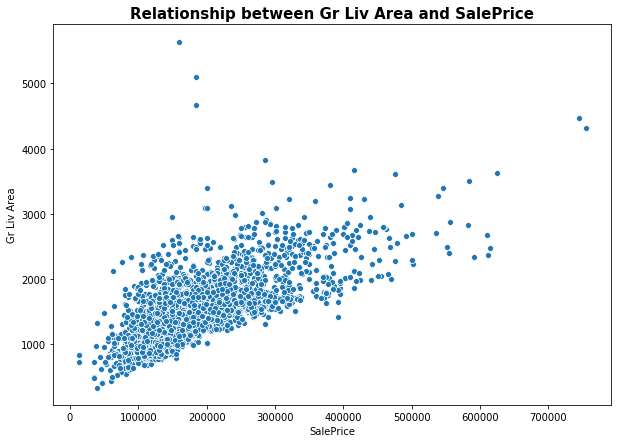

In [7]:
# Show a scatterplot depicting the relationship between Gr Liv Area and SalePrice
plt.figure(figsize=(10,7))
sns.scatterplot(data=housing, x=housing['SalePrice'], y=housing['Gr Liv Area'])
plt.title('Relationship between Gr Liv Area and SalePrice', fontweight='bold', fontsize=15)
plt.show()

There seems to be a linear and positive relationship between the two variables. Let's fit a model using only `Gr Liv Area` as the input and `SalePrice` as the target variable.

We will also calculate RMSE, our accuracy metric. We will use this value of RMSE as the baseline while we try to improve our model. The lower the RMSE, the more accurate the model is.

In [8]:
# Train and test a model with Gr Liv Area as the input and SalePrice as the target variable
train_and_test(housing)

('RMSE Mean: ', '56338.0', 'RMSE Standard Deviation: ', '5042.0')

In [9]:
# Calculate the mean of the SalePrice column
print('The mean SalePrice is: ', round(transform_features(housing)['SalePrice'].mean(),2), 'US Dollars')

The mean SalePrice is:  180796.06 US Dollars


We see that our initial model has an RMSE - Root Mean Squared Error - of more than 56,000 US Dollars, with a Standard Deviation of around 5,000 US Dollars. It means that, if we use our initial model on new data, we would expect an error of this amount in our predictions.

If we consider that the average house price is around 180,000 US Dollars, this is a substantial error to be considered. We will try to reduce RMSE while refining the model.

# Dealing with Missing Values

Next, we will update our `transform_features` function in order to drop all columns that have more than 20% missing values. Besides, we will fill missing values with the mean for numeric columns with less than or equal to 5% of missing values.

In [10]:
# Update the function transform_features so as columns with more than 20% missing values are dropped. 
# And missing values are filled with the mean for numeric columns with up to 5% missing values.
def transform_features(df):
    new = df.copy()
    new.dropna(axis=1, thresh=int(new.shape[0]*0.80), inplace=True)  
    numerics = new.select_dtypes(include=['number']) # show numeric columns
    num_features = numerics.columns # show numeric features
    
    # Fill missing values with the mean for any numeric column with <= than 5% values missing
    for f in num_features:
        col = new[f]
        if col.isnull().sum() <= (new.shape[0]*0.05):
            col.fillna(col.mean(), inplace=True)
    return new

In [11]:
# Display the columns in the dataframe after removing the the ones with too many missing values
transform_features(housing).columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

# Drop Columns that are Not Relevant for Sale Price Prediction
Keeping features that do not contribute to explaining the target variable can negativelly affect model accuracy. In the code below, we update our `transform_features` function to drop the columns that are not useful to the model we want to build. We keep only the variables we believe are relevant for house price prediction.

In [12]:
# Update transform_features to drop irrelevant columns
def transform_features(df):
    new = df.copy()
    new.dropna(axis=1, thresh=int(new.shape[0]*0.80), inplace=True)   
    numerics = new.select_dtypes(include=['number']) # show numeric columns
    num_features = numerics.columns # show numeric features
    
    # Fill missing values with the mean for any numeric column with <= than 5% values missing
    for f in num_features:
        col = new[f]
        if col.isnull().sum() <= (new.shape[0]*0.05):
            col.fillna(col.mean(), inplace=True)
    
    # Drop columns irrelevant to the model
    columns_to_drop = ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Shape', 'Land Contour', 
    'Condition 1', 'Condition 2','Roof Style', 'Roof Matl', 'Exterior 1st', 
    'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 
    'Bsmt Exposure', 'BsmtFin Type 1', 'Neighborhood', 'BsmtFin Type 2', 'Bsmt Unf SF', 'BsmtFin SF 1', 
    'BsmtFin SF 2','Heating QC', 'Central Air','Electrical', 'Low Qual Fin SF', '1st Flr SF', '2nd Flr SF', 
    'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Kitchen Qual', 'Functional', 'Garage Yr Blt', 
    'Garage Finish', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 
    'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Misc Val'] 
    new.drop(columns_to_drop, axis=1, inplace=True)
    return new

In [13]:
# Show columns after dropping the features not relevant to our model
transform_features(housing).columns

Index(['Lot Area', 'Street', 'Utilities', 'Lot Config', 'Land Slope',
       'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Type', 'Total Bsmt SF',
       'Heating', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Type', 'Garage Cars',
       'Pool Area', 'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition',
       'SalePrice'],
      dtype='object')

# Drop Columns that Leak Information About the Target
Data Leakege is a problem that can generate overfitting. It refers to columns that reveal information about the sale that would most probably not be available until the moment the house is sold. 

Therefore, these features should not be included in the model. Below, we identify three columns which may leak data from the target column. We then update our `transform_features` function removing these columns. 

If you want more details on data leakage you can refer to this [article](https://machinelearningmastery.com/data-leakage-machine-learning/).

In [14]:
# Update transform_features to remove columns that leak information about the target
def transform_features(df):
    new = df.copy()
    new.dropna(axis=1, thresh=int(new.shape[0]*0.80), inplace=True)   
    numerics = new.select_dtypes(include=['number']) # show numeric columns
    num_features = numerics.columns # show numeric features
    
    # Fill missing values with the mean for any numeric column with <= than 5% values missing
    for f in num_features:
        col = new[f]
        if col.isnull().sum() <= (new.shape[0]*0.05):
            col.fillna(col.mean(), inplace=True)
    
    # Drop columns irrelevant to the model
    columns_to_drop = ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Shape', 'Land Contour', 
    'Condition 1', 'Condition 2','Roof Style', 'Roof Matl', 'Exterior 1st', 
    'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 
    'Bsmt Exposure', 'BsmtFin Type 1', 'Neighborhood', 'BsmtFin Type 2', 'Bsmt Unf SF', 'BsmtFin SF 1', 
    'BsmtFin SF 2','Heating QC', 'Central Air','Electrical', 'Low Qual Fin SF', '1st Flr SF', '2nd Flr SF', 
    'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Kitchen Qual', 'Functional', 'Garage Yr Blt', 
    'Garage Finish', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 
    'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Misc Val'] 
    new.drop(columns_to_drop, axis=1, inplace=True)
    
    # Drop columns that leak information about the target
    columns_data_leakage = ['Sale Condition', 'Sale Type', 'Mo Sold'] 
    new.drop(columns_data_leakage, axis=1, inplace=True)
    return new

In [15]:
transform_features(housing).columns

Index(['Lot Area', 'Street', 'Utilities', 'Lot Config', 'Land Slope',
       'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Type', 'Total Bsmt SF',
       'Heating', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Type', 'Garage Cars',
       'Pool Area', 'Yr Sold', 'SalePrice'],
      dtype='object')

# Creating New Features 
Now that we have a cleaner dataset, let's check if we can combine or transform some of the features to get data that will be more relevant for modeling.

We identified three columns that we can modify: `Year Built`, `Year Remod/Add` and `Yr Sold`. 
- We will subtract `Year Built` from `Yr Sold` to create a new column called `Building Age`. 
- We will subtract `Year Remod/Add` from `Yr Sold` to create a new column called `Remodel Age`. 

Below, we update the `transform_features` function accordingly.

In [16]:
# Update transform_features to create new columns Building Age and Remodel Age.
def transform_features(df):
    new = df.copy()
    new.dropna(axis=1, thresh=int(new.shape[0]*0.80), inplace=True)   
    numerics = new.select_dtypes(include=['number']) # show numeric columns
    num_features = numerics.columns # show numeric features
    
    # Fill missing values with the mean for any numeric column with <= than 5% values missing
    for f in num_features:
        col = new[f]
        if col.isnull().sum() <= (new.shape[0]*0.05):
            col.fillna(col.mean(), inplace=True)
    
    # Drop columns irrelevant to the model
    columns_to_drop = ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Shape', 'Land Contour', 
    'Condition 1', 'Condition 2','Roof Style', 'Roof Matl', 'Exterior 1st', 
    'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 
    'Bsmt Exposure', 'BsmtFin Type 1', 'Neighborhood', 'BsmtFin Type 2', 'Bsmt Unf SF', 'BsmtFin SF 1', 
    'BsmtFin SF 2','Heating QC', 'Central Air','Electrical', 'Low Qual Fin SF', '1st Flr SF', '2nd Flr SF', 
    'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Kitchen Qual', 'Functional', 'Garage Yr Blt', 
    'Garage Finish', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 
    'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Misc Val'] 
    new.drop(columns_to_drop, axis=1, inplace=True)
    
    # Drop columns that leak information about the target
    columns_data_leakage = ['Sale Condition', 'Sale Type', 'Mo Sold'] 
    new.drop(columns_data_leakage, axis=1, inplace=True)
    
    # Creating new columns Building Age and Remodel Age
    new['Building Age'] = new['Yr Sold'] - new['Year Built']
    new['Remodel Age'] = new['Yr Sold'] - new['Year Remod/Add']
    new.drop(['Year Built', 'Year Remod/Add', 'Yr Sold'], axis=1, inplace=True)
    return new

# Convert Features Into the Right Data Types
We will need to convert 9 columns from the generic type `object` into `category`. We will also convert the `Lot Area`, `Gr Liv Area`, `Pool Area` and `SalePrice` into Float. Let's again update `transform_features` accordingly.

In [17]:
# Convert object columns into category and some integer columns into float
def transform_features(df):
    new = df.copy()
    new.dropna(axis=1, thresh=int(new.shape[0]*0.80), inplace=True)   
    numerics = new.select_dtypes(include=['number']) # show numeric columns
    num_features = numerics.columns # show numeric features
    
    # Fill missing values with the mean for any numeric column with <= than 5% values missing
    for f in num_features:
        col = new[f]
        if col.isnull().sum() <= (new.shape[0]*0.05):
            col.fillna(col.mean(), inplace=True)
    
    # Drop columns irrelevant to the model
    columns_to_drop = ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Shape', 'Land Contour', 
    'Condition 1', 'Condition 2','Roof Style', 'Roof Matl', 'Exterior 1st', 
    'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 
    'Bsmt Exposure', 'BsmtFin Type 1', 'Neighborhood', 'BsmtFin Type 2', 'Bsmt Unf SF', 'BsmtFin SF 1', 
    'BsmtFin SF 2','Heating QC', 'Central Air','Electrical', 'Low Qual Fin SF', '1st Flr SF', '2nd Flr SF', 
    'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Kitchen Qual', 'Functional', 'Garage Yr Blt', 
    'Garage Finish', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 
    'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Misc Val'] 
    new.drop(columns_to_drop, axis=1, inplace=True)
    
    # Drop columns that leak information about the target
    columns_data_leakage = ['Sale Condition', 'Sale Type', 'Mo Sold'] 
    new.drop(columns_data_leakage, axis=1, inplace=True)
    
    # Creating new columns Building Age and Remodel Age
    new['Building Age'] = new['Yr Sold'] - new['Year Built']
    new['Remodel Age'] = new['Yr Sold'] - new['Year Remod/Add']
    new.drop(['Year Built', 'Year Remod/Add', 'Yr Sold'], axis=1, inplace=True)
    
    # Convert object columns into category and some integer columns into float
    new[new.select_dtypes(['object']).columns] = new.select_dtypes(['object']).apply(lambda x: x.astype('category'))
    cols_to_float = ['Lot Area', 'Gr Liv Area', 'Pool Area', 'SalePrice']
    new[cols_to_float] = new[cols_to_float].astype('float') 
    return new

# Feature Selection: Numeric Columns
We will now verify the numeric columns with the highest correation with our target column `SalePrice`. A high correlation with the target indicates that the feature probably will be relevant for modelling.

We will consider the absolute value of the correlation, since both negative and positive correlation with `SalePrice` are relevant for modeling.

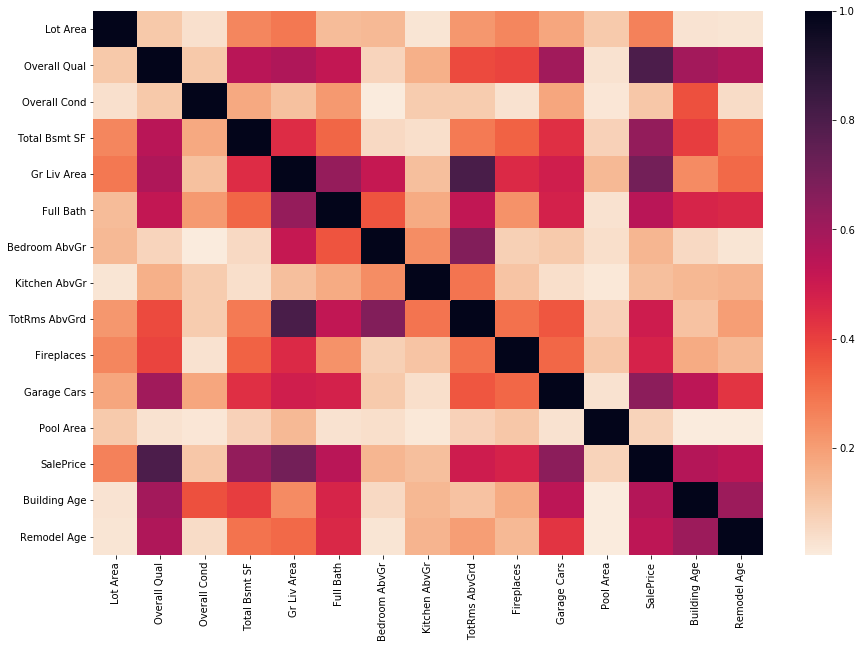

In [18]:
# Create a heatmap with the correlation among the numeric columns
plt.figure(figsize=(15,10))
sns.heatmap(abs(transform_features(housing).corr()), cmap='rocket_r')
plt.show()

It seems 7 columns highly correlate with `SalePrice`: 
- Overall Qual 
- Total Bsmt SF
- Gr Liv Area 
- Full Bath
- Garage Cars
- Building Age
- Remodel Age

Let's verify the correlation of each of these columns and `SalePrice`.

In [19]:
# Calculate correlation of numeric features and SalePrice in descending order
transform_features(housing).corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
Overall Qual     0.799262
Gr Liv Area      0.706780
Garage Cars      0.647861
Total Bsmt SF    0.632105
Full Bath        0.545604
TotRms AbvGrd    0.495474
Fireplaces       0.474558
Lot Area         0.266549
Bedroom AbvGr    0.143913
Pool Area        0.068403
Overall Cond    -0.101697
Kitchen AbvGr   -0.119814
Remodel Age     -0.534940
Building Age    -0.558907
Name: SalePrice, dtype: float64

The correlation confirms that these columns correlate with `SalePrice`. As expected, `Building Age` and `Remodel Age` have a negative relation with `SalePrice` (the older the house, the lower the price).

Let's create a list with the numeric columns with highest correlation with `SalePrice` for further exploration.

In [20]:
# Create a list with the 7 numerical columns that highly correlate with SalePrice
numeric_selected = ['SalePrice', 'Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Full Bath', 
                    'Garage Cars', 'Building Age', 'Remodel Age']

## Display Scatterplots to Verify the Relationship Between the Numeric Columns
Next, let's create pairplots to verify the relationship between the feature columns and `SalePrice` and also among the features themselves.

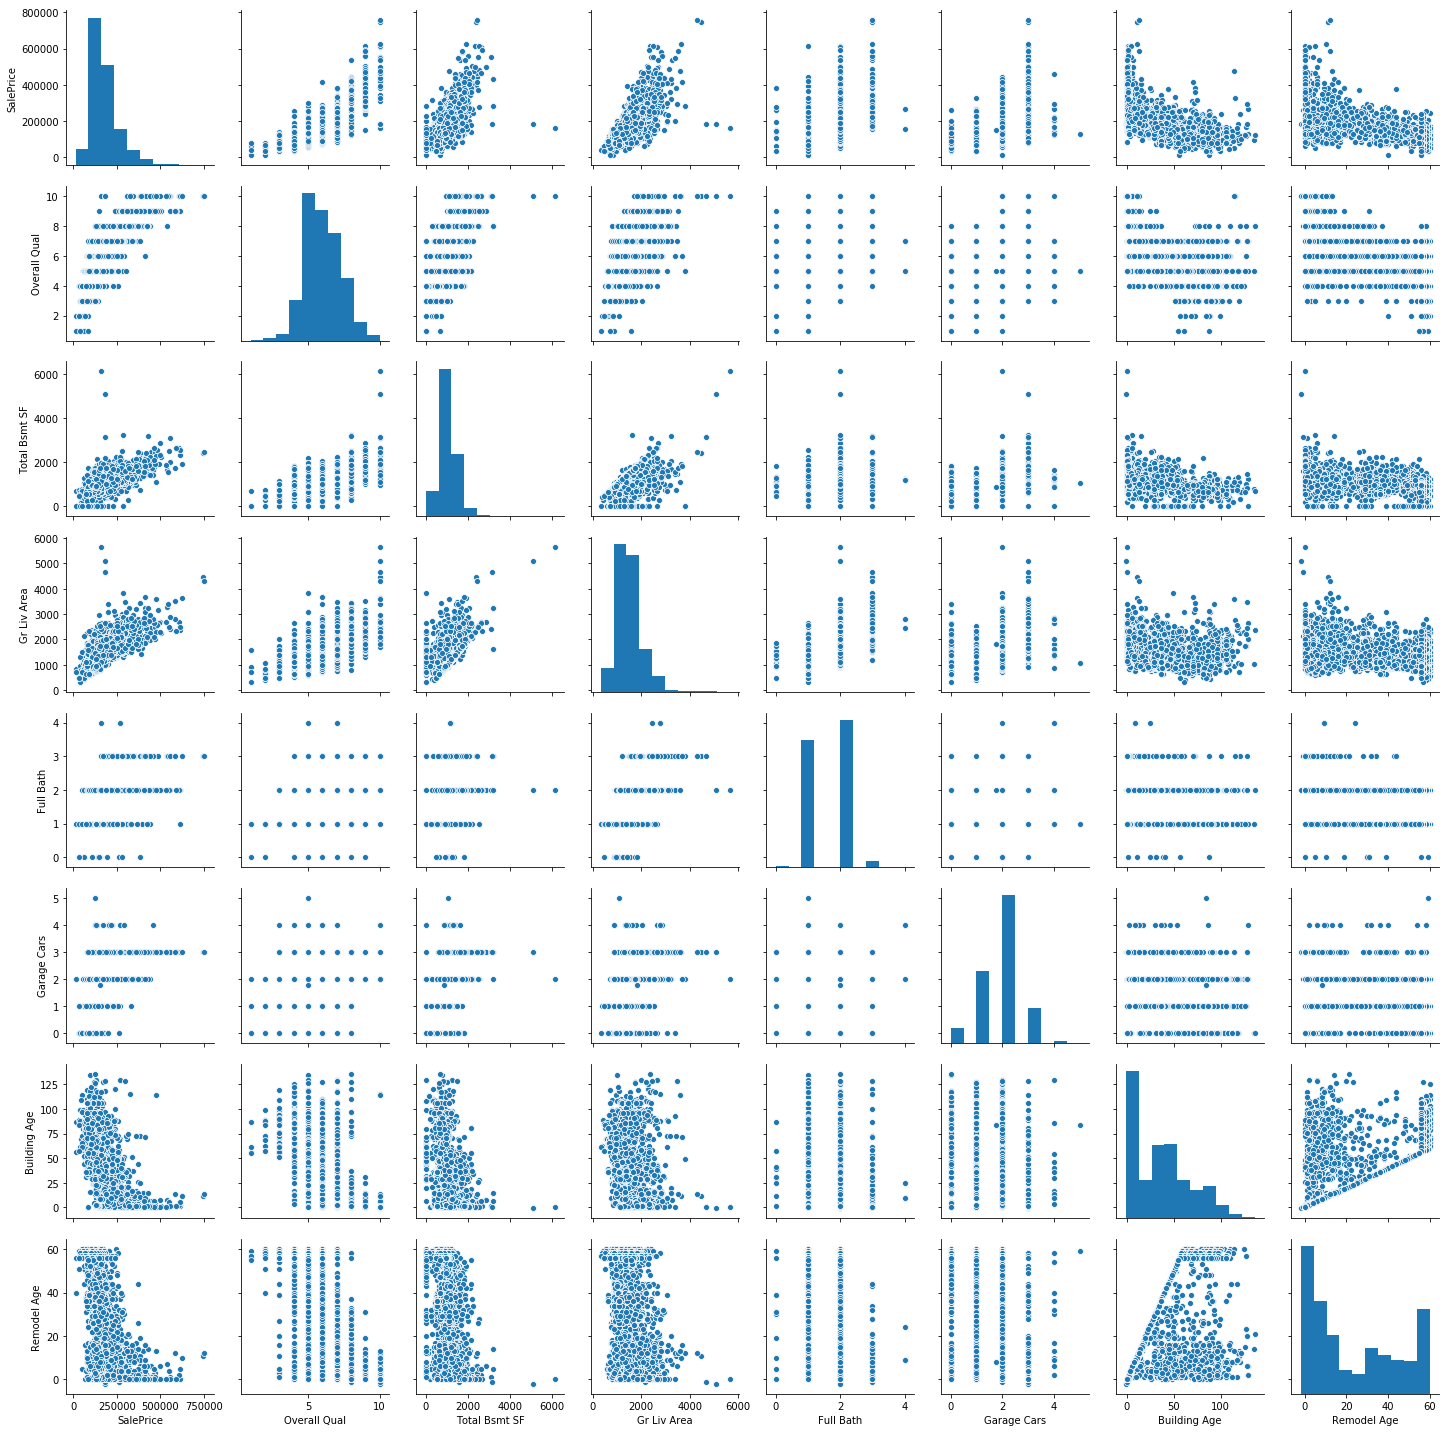

In [21]:
# Create a pairplot to verify the relationship among the numeric columns
sns.pairplot(transform_features(housing)[numeric_selected])
plt.show()

All 7 numerical columns seem to have a linear relationship with `SalePrice`. Looking at the graphs, we also see that there seems to be a strong relationship between some of the features, what can have a negative impact for modeling.

Let's calculate the correlation among the features, since we must avoid high correlation between them.

In [22]:
# Calculate the correlation between the numerical columns
transform_features(housing)[numeric_selected].corr()

,SalePrice,Overall Qual,Total Bsmt SF,Gr Liv Area,Full Bath,Garage Cars,Building Age,Remodel Age
SalePrice,1.000000,0.799262,0.632105,0.706780,0.545604,0.647861,-0.558907,-0.534940
Overall Qual,0.799262,1.000000,0.547088,0.570556,0.522263,0.599483,-0.597021,-0.570956
Total Bsmt SF,0.632105,0.547088,1.000000,0.444567,0.324915,0.437517,-0.407311,-0.298021
Gr Liv Area,0.706780,0.570556,0.444567,1.000000,0.630321,0.488794,-0.242510,-0.318549
Full Bath,0.545604,0.522263,0.324915,0.630321,1.000000,0.478131,-0.468900,-0.457598
Garage Cars,0.647861,0.599483,0.437517,0.488794,0.478131,1.000000,-0.537370,-0.426816
Building Age,-0.558907,-0.597021,-0.407311,-0.242510,-0.468900,-0.537370,1.000000,0.613364
Remodel Age,-0.534940,-0.570956,-0.298021,-0.318549,-0.457598,-0.426816,0.613364,1.000000


Let's consider a threshold of 0.6 for the correlation between the features. 
- `Overall Qual` has a strong correlation with `Building Age` and `Garage Cars`.
- `Gr Liv Area` has a strong correlation with `Full Bath`.
- `Building Age` has a strong correlation with `Remodel Age`.

If we take the features highly correlated, let's see which ones have the highest correlation with `SalePrice`.
- `Overall Qual` has the highest correlation with `SalePrice` (0.8) if compared to `Building Age` and `Garage Cars`.
- `Gr Liv Area` has the highest correlation with `SalePrice` (0.71) if compared to `Full Bath`.
- `Building Age` has the highest correlation with `SalePrice` (-0.56) if compared to `Remodel Age`.

Let's remove the columns `Garage Cars`, `Full Bath` and `Remodel Age` to minimize correlation within the features.

In [23]:
# Revised list of numerical columns after removing highly correlated features
numeric_revised = ['SalePrice', 'Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Building Age']
transform_features(housing)[numeric_revised].corr()

,SalePrice,Overall Qual,Total Bsmt SF,Gr Liv Area,Building Age
SalePrice,1.000000,0.799262,0.632105,0.706780,-0.558907
Overall Qual,0.799262,1.000000,0.547088,0.570556,-0.597021
Total Bsmt SF,0.632105,0.547088,1.000000,0.444567,-0.407311
Gr Liv Area,0.706780,0.570556,0.444567,1.000000,-0.242510
Building Age,-0.558907,-0.597021,-0.407311,-0.242510,1.000000


## Verify If There Are Still Missing Values in the Numeric Columns
Below we see there are no missing values in the four numerical columns we are considering for modeling.

In [24]:
transform_features(housing)[numeric_revised].isnull().sum()

SalePrice        0
Overall Qual     0
Total Bsmt SF    0
Gr Liv Area      0
Building Age     0
dtype: int64

## Determine If We Should Include or Not Building Age
We observe that the columns `Building Age` and `Overall Qual` correlation are in the limit of the threshold we established (0.6). At the same time, `Overall Qual` correlation with `SalePrice` is much higher than `Building Age` (0.80 vs 0.59). 

Let's fit a model with and without the `Building Age` column, to verify if the inclusion of this column improves model performance.

In [25]:
# Create two lists of features with and without building age
without_building_age = ['SalePrice', 'Overall Qual', 'Total Bsmt SF', 'Gr Liv Area']
with_building_age = ['SalePrice', 'Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Building Age']

Next, we run the model with and without the `Building Age` column and perform Cross-validation to verify if the inclusion of this column improves model accuracy.

### Model Without Building Age

In [26]:
# Update select_features with list of features without Building Age
def select_features(df):
    transformed = transform_features(df)
    features = transformed[without_building_age]
    return features

In [27]:
# Perform Cross-validation to check RMSE
train_and_test(housing)

('RMSE Mean: ', '38675.0', 'RMSE Standard Deviation: ', '5555.0')

We see that the new model is considerably better than the initial one. We reduced RMSE from more than 50,000 to 38,675. Let's check how the model including `Building Age` performs.

### Model With Building Age

In [28]:
# Update select_features with the list of features with Building Age
def select_features(df):
    transformed = transform_features(df)
    features = transformed[with_building_age]
    return features

In [29]:
# Perform Cross-validation to check RMSE
train_and_test(housing)

('RMSE Mean: ', '37336.0', 'RMSE Standard Deviation: ', '5943.0')

The model with the 4 numerical features **including** `Building Age` is even better. We managed to reduce RMSE from 38,675 (without `Building Age`) to 37,336 (with `Building Age`). Let's keep the 4 numerical columns in the model. 

We will update a list called `numerical_columns` with the 4 numerical columns, including `Building Age`.

In [30]:
# Update the numerical_columns with the target column and the 4 features
numerical_columns = ['SalePrice', 'Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Building Age']

# Update select_features with the target and the 4 features
def select_features(df):
    transformed = transform_features(df)
    features = transformed[numerical_columns]
    return features

# Check for Outliers in the Numerical Columns
In the code below, we will build Boxplots and calculate the main descriptive statistics to identify outliers.

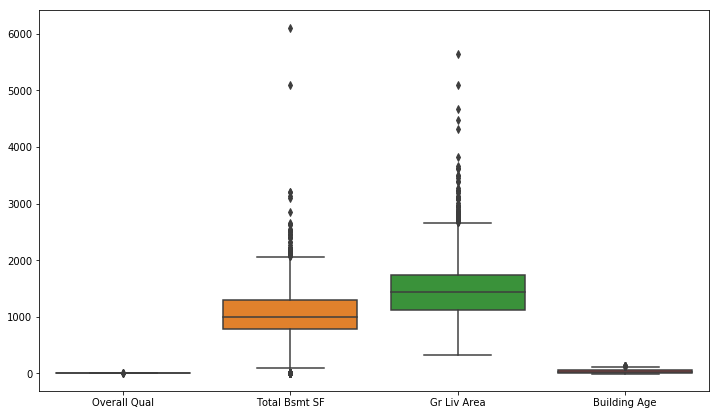

In [31]:
# Display Boxplots for the 4 numerical columns to check for outliers
plt.figure(figsize=(12,7))
sns.boxplot(data=transform_features(housing)[['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Building Age']])
plt.show()

In [32]:
# Display descriptive statistics for the 4 numerical columns
transform_features(housing)[['Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Building Age']].describe()

,Overall Qual,Total Bsmt SF,Gr Liv Area,Building Age
count,2930.000000,2930.000000,2930.000000,2930.000000
mean,6.094881,1051.614544,1499.690444,36.434130
std,1.411026,440.539845,505.508887,30.291357
min,1.000000,0.000000,334.000000,-1.000000
25%,5.000000,793.000000,1126.000000,7.000000
50%,6.000000,990.000000,1442.000000,34.000000
75%,7.000000,1301.500000,1742.750000,54.000000
max,10.000000,6110.000000,5642.000000,136.000000


Outliers analysis shows that:
- `Building Age` has negative values, what does not make sense. We will exclude rows with negative values for this column.
- `Gr Liv Area` and `Total Bsmt SF` include some extremely high values. 

Looking at the Boxplots, we see that values higher than 3,500 square feet for `Gr Liv Area` and/or 3,000 square feed for `Total Bsmt SF` (Total square feet of basement area) are too distant from the other values in the distribution. 

**These values are more than 4 Standard Deviations higher than the median**.

Let's verify how many rows in the dataframe can be classified as outliers.

In [33]:
# Rows with negative values for Building Age
transform_features(housing)[transform_features(housing)['Building Age'] < 0]

,Lot Area,Street,Utilities,Lot Config,Land Slope,Bldg Type,House Style,Overall Qual,Overall Cond,Mas Vnr Type,...,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Type,Garage Cars,Pool Area,SalePrice,Building Age,Remodel Age
2180,39290.0,Pave,AllPub,Inside,Gtl,1Fam,1Story,10,5,Stone,...,2,1,15,2,Attchd,3.0,0.0,183850.0,-1,-2


There is only one row in the whole dataframe with negative values for `Building Age`. Let's update `transform_features` to exclude this row for analysis.

Let's now check how many rows have values higher than 3,500 square feet for `Gr Liv Area` and/or higher than 3,000 square feet for `Total Bsmt SF`.

In [34]:
# Display rows in which Gr Liv Area is > 3,500 and/or Total Bsmt SF is > 3,000
transform_features(housing)[
    (transform_features(housing)['Gr Liv Area'] > 3500) | 
    (transform_features(housing)['Total Bsmt SF'] > 3000)
][['Gr Liv Area','Total Bsmt SF' ]]

,Gr Liv Area,Total Bsmt SF
423,2402.0,3094.0
444,1629.0,3206.0
1497,3820.0,0.0
1498,5642.0,6110.0
1760,4476.0,2396.0
1767,4316.0,2444.0
1772,3228.0,3200.0
2180,5095.0,5095.0
2181,4676.0,3138.0
2445,3627.0,1930.0


As shown above, only 12 rows from the whole dataframe have values that are higher than the thresholds in `Gr Liv Area` and/or `Total Bsmt SF`. 

Considering that these values are rare in the dataset and are more than 4 Standard Deviations higher than the median, we will update `transform_features` to remove these rows for analysis.

In [35]:
# Update transform_features to remove outliers
def transform_features(df):
    new = df.copy()
    new.dropna(axis=1, thresh=int(new.shape[0]*0.80), inplace=True)   
    numerics = new.select_dtypes(include=['number']) # show numeric columns
    num_features = numerics.columns # show numeric features
    
    # Fill missing values with the mean for any numeric column with <= than 5% values missing
    for f in num_features:
        col = new[f]
        if col.isnull().sum() <= (new.shape[0]*0.05):
            col.fillna(col.mean(), inplace=True)
    
    # Drop columns irrelevant to the model
    columns_to_drop = ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Shape', 'Land Contour', 
    'Condition 1', 'Condition 2','Roof Style', 'Roof Matl', 'Exterior 1st', 
    'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 
    'Bsmt Exposure', 'BsmtFin Type 1', 'Neighborhood', 'BsmtFin Type 2', 'Bsmt Unf SF', 'BsmtFin SF 1', 
    'BsmtFin SF 2','Heating QC', 'Central Air','Electrical', 'Low Qual Fin SF', '1st Flr SF', '2nd Flr SF', 
    'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Kitchen Qual', 'Functional', 'Garage Yr Blt', 
    'Garage Finish', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 
    'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Misc Val'] 
    new.drop(columns_to_drop, axis=1, inplace=True)
    
    # Drop columns that leak information about the target
    columns_data_leakage = ['Sale Condition', 'Sale Type', 'Mo Sold'] 
    new.drop(columns_data_leakage, axis=1, inplace=True)
    
    # Creating new columns Building Age and Remodel Age
    new['Building Age'] = new['Yr Sold'] - new['Year Built']
    new['Remodel Age'] = new['Yr Sold'] - new['Year Remod/Add']
    new.drop(['Year Built', 'Year Remod/Add', 'Yr Sold'], axis=1, inplace=True)
    
    # Convert object columns into category and some integer columns into float
    new[new.select_dtypes(['object']).columns] = new.select_dtypes(['object']).apply(lambda x: x.astype('category'))
    cols_to_float = ['Lot Area', 'Gr Liv Area', 'Pool Area', 'SalePrice']
    new[cols_to_float] = new[cols_to_float].astype('float') 
    
    # Remove outliers
    new = new[new['Building Age'] > 0]
    new = new[(new['Gr Liv Area'] <= 3500) | (new['Total Bsmt SF'] <= 3000)]
    return new

Now that we removed the outliers, let's recalculate RMSE to verify if we are improving model accuracy.

In [36]:
# Perform Cross-validation after removing the outliers including the 4 numerical columns as predictors
train_and_test(housing)

('RMSE Mean: ', '33525.0', 'RMSE Standard Deviation: ', '3476.0')

Before removing the outliers RMSE was 37336. After removing them, we obtained an even better (lower) RMSE of 33,525. Therefore, we continue to improve results.

In the next session, we will deal with non-numerical columns.

# Dealing with Categorical Columns
Next, we will analyze non-numeridal columns. We will check on categorical variables and see which ones are worth including in the model.

We start by listing the categorical columns we have in the dataset.

In [37]:
# Save categorical columns in a dataframe called category_cols
category_cols = transform_features(housing).select_dtypes('category')

# Save category column names in a variable called category_features
category_features = list(category_cols.columns)
print(category_features)

['Street', 'Utilities', 'Lot Config', 'Land Slope', 'Bldg Type', 'House Style', 'Mas Vnr Type', 'Heating', 'Garage Type']


## Visualize the Distribution of Each Categorical Column
We start to analyze non-numerical columns checking how their values are distributed. Columns concentrated in only one category will most probably have low variance and limited potential to improve model performance.

Let's check the categorical features in which 95% or more of the values are concentrated in only one category (around 2,600 rows). Below, we show the total number of rows and columns we have in the housing dataframe after the transformations we performed so far were implemented.

In [38]:
# Display the total number of rows and columns in the housing dataset
print(transform_features(housing).shape)

(2813, 24)


Next, we will show for each categorical column, how values are distributed in different categories. We will try to identify columns with low variance, that is, highly concentrated in only one category.

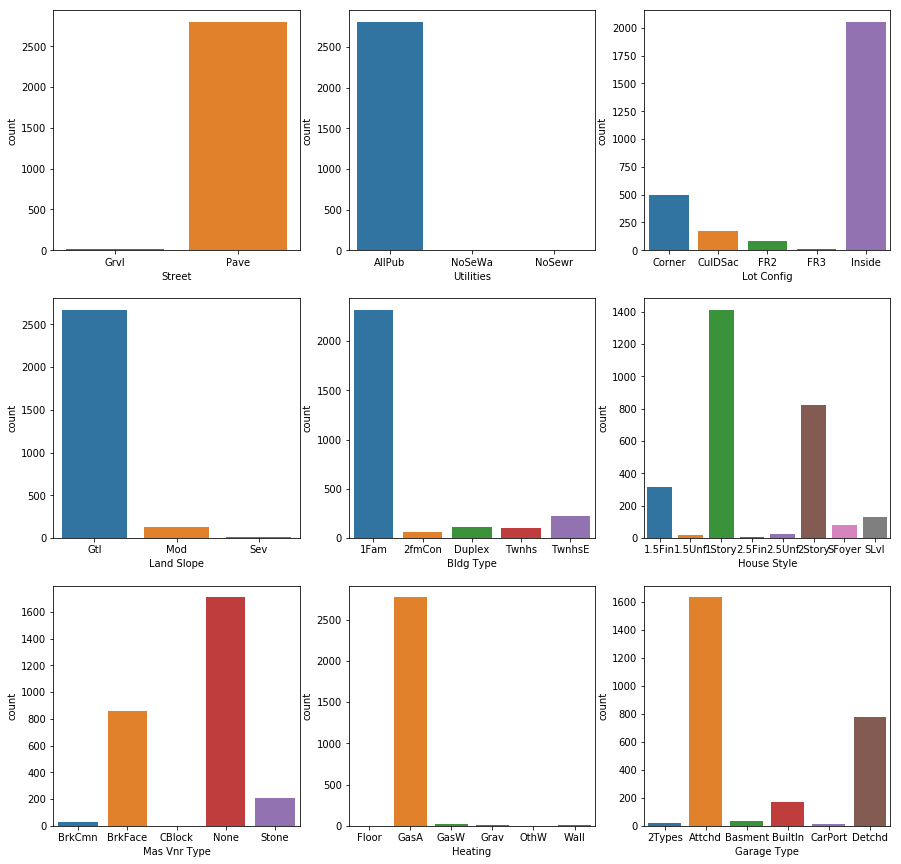

In [39]:
# For each categorical feature, display the total number of houses classified in each category
fig = plt.figure(figsize=(15,15))
index = range(0,9)
for i in index:
    axis = fig.add_subplot(3,3,i+1)
    sns.countplot(x=category_features[i], data=category_cols, ax=axis)
plt.show()

Four out of the 9 categorical columns have most of their values concentrated in only one category:
- `Street`
- `Utilities`
- `Land Slope`
- `Heating`

Let's update the `category_features` list removing these 4 columns.

In [40]:
# Update category_list removing the 4 columns concentrated in only one category
category_features = ['Lot Config', 'Bldg Type', 'House Style', 'Mas Vnr Type','Garage Type']

## Evaluate How Much Each Categorical Feature is Correlated with SalePrice
Now that we filtered down our categorical columns to 5, we need to see how much these variables are related to `SalePrice`. It only makes sense to include variables that have a substantial relationship with the target column.

To analyze this, for each categorical variable we will create a Boxplot. The Boxplot will show the distribution of each category in terms of `SalePrice`.

If the categories distributions for `SalePrice` are similar, it means that there might not be a relationship between the feature and `SalePrice`. On the other hand, if each category has a different distribution of `SalePrice`, it means that the feature might be related to the target column.

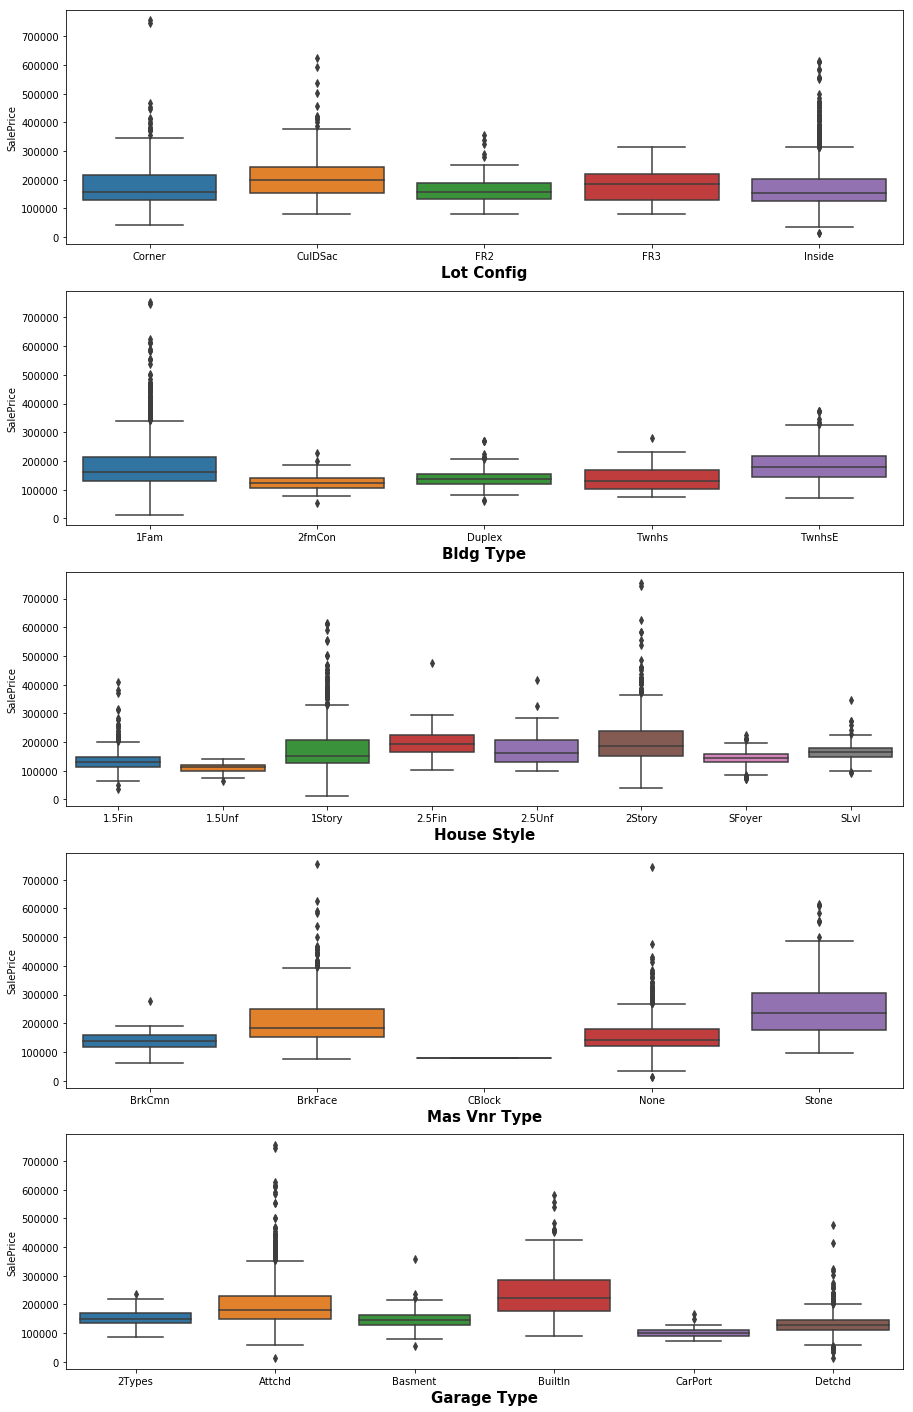

In [41]:
# Display Boxplots for each category of each non-numerical column
fig = plt.figure(figsize=(15,25))
for i in range(5):
    axis = fig.add_subplot(5,1,i+1)
    sns.boxplot(data=transform_features(housing), x=category_features[i], y='SalePrice', ax=axis)
    plt.xlabel(category_features[i], fontweight='bold', fontsize=15)
plt.show()

Analyzing the Boxplots above, we see that the columns `Lot Config` and `Bldg Type` show very similar `SalePrice` distribution for their categories. That means these columns seem not to be linked to `SalePrice`.

Let's remove these two columns from our analysis. We will end up with three categorical columns.

In [42]:
# Update category_features with the remaining categorical columns
category_features = ['House Style', 'Mas Vnr Type','Garage Type']

# Convert Categorical Columns into Dummy Variables
Next, we will convert the 3 categorical columns into numerical dummy variables. This is an important step to make them useful for modeling. 

Let's update the `transform_features` function to convert these columns into dummies - binary variables with 0s and 1s - and drop the previous categorical columns from the dataframe.

In [43]:
# Convert the 3 categorical columns into dummy variables
def transform_features(df):
    new = df.copy()
    new.dropna(axis=1, thresh=int(new.shape[0]*0.80), inplace=True)   
    numerics = new.select_dtypes(include=['number']) # show numeric columns
    num_features = numerics.columns # show numeric features
    
    # Fill missing values with the mean for any numeric column with <= than 5% values missing
    for f in num_features:
        col = new[f]
        if col.isnull().sum() <= (new.shape[0]*0.05):
            col.fillna(col.mean(), inplace=True)
    
    # Drop columns irrelevant to the model
    columns_to_drop = ['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Shape', 'Land Contour', 
    'Condition 1', 'Condition 2','Roof Style', 'Roof Matl', 'Exterior 1st', 
    'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 
    'Bsmt Exposure', 'BsmtFin Type 1', 'Neighborhood', 'BsmtFin Type 2', 'Bsmt Unf SF', 'BsmtFin SF 1', 
    'BsmtFin SF 2','Heating QC', 'Central Air','Electrical', 'Low Qual Fin SF', '1st Flr SF', '2nd Flr SF', 
    'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Kitchen Qual', 'Functional', 'Garage Yr Blt', 
    'Garage Finish', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 
    'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Misc Val'] 
    new.drop(columns_to_drop, axis=1, inplace=True)
    
    # Drop columns that leak information about the target
    columns_data_leakage = ['Sale Condition', 'Sale Type', 'Mo Sold'] 
    new.drop(columns_data_leakage, axis=1, inplace=True)
    
    # Creating new columns Building Age and Remodel Age
    new['Building Age'] = new['Yr Sold'] - new['Year Built']
    new['Remodel Age'] = new['Yr Sold'] - new['Year Remod/Add']
    new.drop(['Year Built', 'Year Remod/Add', 'Yr Sold'], axis=1, inplace=True)
    
    # Converting object columns into category and some integer columns into float
    new[new.select_dtypes(['object']).columns] = new.select_dtypes(['object']).apply(lambda x: x.astype('category'))
    cols_to_float = ['Lot Area', 'Gr Liv Area', 'Pool Area', 'SalePrice']
    new[cols_to_float] = new[cols_to_float].astype('float') 
    
    # Remove outliers
    new = new[new['Building Age'] > 0]
    new = new[(new['Gr Liv Area'] <= 3500) | (new['Total Bsmt SF']<=3000)]    
    
    # Converting the 3 categorical columns into dummies
    category_features = ['House Style', 'Mas Vnr Type','Garage Type']
    for i in category_features:
        dummy = pd.get_dummies(new[i], dtype=float)
        new = pd.concat([new, dummy], axis=1)
        new = new.drop(i, axis=1)
    return new

## List of Dummy Variables
Below, we create a new list called `dummy_features` to be used in the model.

In [44]:
# Create dummy_features
dummy_features = list(transform_features(housing).columns[-19:])
print(dummy_features)

['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl', 'BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone', '2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd']


## Check Dummy Variables With More than 95% of Zeros
Let's verify which dummy columns we need to drop. We will remove all columns with more than 95% of its values concentrated in 0s or 1s. The ones that follow this pattern will most probably not be relevant for modeling.

In [45]:
# Calculate the percentage of each dummy variable that is 1 (%)
round(transform_features(housing)[dummy_features].mean().sort_values()*100,2)

CBlock      0.04
2.5Fin      0.28
CarPort     0.53
1.5Unf      0.68
2Types      0.82
2.5Unf      0.85
BrkCmn      0.89
Basment     1.28
SFoyer      2.95
SLvl        4.55
BuiltIn     6.11
Stone       7.32
1.5Fin     11.16
Detchd     27.66
2Story     29.29
BrkFace    30.39
1Story     50.23
Attchd     58.09
None       60.72
dtype: float64

The following dummy columns have more than 95% of 0s and will be removed:

In [46]:
# Display category features with more than 95% of zeros
round(transform_features(housing)[dummy_features].mean().sort_values()*100,2).head(10)

CBlock     0.04
2.5Fin     0.28
CarPort    0.53
1.5Unf     0.68
2Types     0.82
2.5Unf     0.85
BrkCmn     0.89
Basment    1.28
SFoyer     2.95
SLvl       4.55
dtype: float64

In [47]:
# Update dummy_features list removing columns with more than 95% of zeros
dummy_features = ['1.5Fin', '1Story', '2Story', 'BrkFace', 'None', 'Stone', 'Attchd', 'BuiltIn','Detchd']
dummy_features_with_saleprice = ['SalePrice','1.5Fin', '1Story', '2Story', 'BrkFace', 'None', 'Stone', 'Attchd', 
                            'BuiltIn','Detchd']

## Evaluate Correlation Within Dummy Variables and With SalePrice
Next, we will check if there are dummy columns that are highly correlated, that is, correlation close to 0.7 or higher.

In [48]:
# Display correlation matrix with final list of dummy variables
transform_features(housing)[dummy_features_with_saleprice].corr()

,SalePrice,1.5Fin,1Story,2Story,BrkFace,None,Stone,Attchd,BuiltIn,Detchd
SalePrice,1.000000,-0.181762,-0.035289,0.216984,0.262883,-0.395237,0.283203,0.347564,0.221262,-0.360013
1.5Fin,-0.181762,1.000000,-0.356114,-0.228154,-0.180243,0.220392,-0.082309,-0.261724,-0.057479,0.293151
1Story,-0.035289,-0.356114,1.000000,-0.646626,0.002356,-0.074170,0.118784,0.243845,-0.250447,-0.120481
2Story,0.216984,-0.228154,-0.646626,1.000000,0.089240,-0.059686,-0.043005,-0.026344,0.256304,-0.069670
BrkFace,0.262883,-0.180243,0.002356,0.089240,1.000000,-0.821560,-0.185755,0.235509,0.063616,-0.234073
None,-0.395237,0.220392,-0.074170,-0.059686,-0.821560,1.000000,-0.349483,-0.283443,-0.095502,0.293915
Stone,0.283203,-0.082309,0.118784,-0.043005,-0.185755,-0.349483,1.000000,0.103266,0.064950,-0.115846
Attchd,0.347564,-0.261724,0.243845,-0.026344,0.235509,-0.283443,0.103266,1.000000,-0.300434,-0.727908
BuiltIn,0.221262,-0.057479,-0.250447,0.256304,0.063616,-0.095502,0.064950,-0.300434,1.000000,-0.157793
Detchd,-0.360013,0.293151,-0.120481,-0.069670,-0.234073,0.293915,-0.115846,-0.727908,-0.157793,1.000000


Below, we point out the columns with high correlation:
- `1Story` and `2Story`
- `None` and `BrkFace`
- `Detchd` and `Attchd`

If we compare the correlations each column has with `SalePrice`, we see that:
- `2Story` has higher correlation than `1Story`
- `None` has higher correlation than `BrkFace`
- `Detchd` has higher correlation than `Attchd`

Let's update again the `dummy_features` list removing the columns with lower correlation with `SalePrice`.

In [49]:
# Update dummy_features_with_saleprice removing highly correlated columns
dummy_features_with_saleprice = ['SalePrice', '1.5Fin', '2Story', 'None', 'Stone', 'BuiltIn','Detchd']

## Order Dummy Columns According to their Correlation with SalePrice

In [50]:
# Display dummy features correlation absolute values with SalePrice. Order correlations in descending order.
abs(transform_features(housing)[dummy_features_with_saleprice].corr()['SalePrice']).sort_values(ascending=False)

SalePrice    1.000000
None         0.395237
Detchd       0.360013
Stone        0.283203
BuiltIn      0.221262
2Story       0.216984
1.5Fin       0.181762
Name: SalePrice, dtype: float64

Now, let's save the list of `dummy_features` in order, according to their absolute correlation with `SalePrice`.

In [51]:
# Save dummy_features in descending order - from left to right - according to the correlation with SalePrice.
dummy_features_ordered = ['None', 'Detchd', 'Stone', 'BuiltIn', '2Story', '1.5Fin' ]

## Use K-Fold Cross Validation to Verify Dummy Variables to Include in the Model
Now that we have a list of dummy features in order of their correlation with `SalePrice`, let's add them to the numerical columns and see how the model accuracy improves as we include new features.

We will add one dummy feature at a time. Everytime we add a new dummy variable, we will perform Cross-validation and recalculate RMSE. When RMSE starts growing or stops to decrease, it means the additional feature is not improving model performance and will probably not be relevant for modeling.

In the code below, we fit 6 different models. For each model, we include an additional dummy feature and perform Cross-validation. 

**The baseline for RMSE considering only the 4 numerical columns - before we start adding the dummies - is 33,525.**

In [52]:
# Display numerical_columns
print(numerical_columns)

['SalePrice', 'Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Building Age']


In [53]:
# Display dummy_features_ordered according to correlation with SalePrice
print(dummy_features_ordered)

['None', 'Detchd', 'Stone', 'BuiltIn', '2Story', '1.5Fin']


In [54]:
# Fit a model and perform 10-Fold Cross-validation on each of the 6 models
# For each model include an additional dummy from dummy_features_ordered 
for feature in dummy_features_ordered:
    def select_features(housing):
        transformed = transform_features(housing)
        f = numerical_columns
        f += [feature]
        features = transformed[f]
        return features
     
    print('Model including the other features and adding: ', feature)
    print(train_and_test(housing))
    print('\n')

Model including the other features and adding:  None
('RMSE Mean: ', '33531.0', 'RMSE Standard Deviation: ', '3473.0')


Model including the other features and adding:  Detchd
('RMSE Mean: ', '33546.0', 'RMSE Standard Deviation: ', '3462.0')


Model including the other features and adding:  Stone
('RMSE Mean: ', '33333.0', 'RMSE Standard Deviation: ', '3417.0')


Model including the other features and adding:  BuiltIn
('RMSE Mean: ', '33295.0', 'RMSE Standard Deviation: ', '3401.0')


Model including the other features and adding:  2Story
('RMSE Mean: ', '33195.0', 'RMSE Standard Deviation: ', '3387.0')


Model including the other features and adding:  1.5Fin
('RMSE Mean: ', '33082.0', 'RMSE Standard Deviation: ', '3436.0')




The RMSE is lower than the model without the dummy variables, but it seems the columns `None` and `Detchd` are not helping to improve model accuracy. Let's remove these two columns from the list and run the models again.

In [55]:
# Remove the features None and Detchd from dummy_features_ordered
dummy_features_ordered = ['Stone', 'BuiltIn', '2Story', '1.5Fin']
numerical_columns = ['SalePrice', 'Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Building Age']

In [56]:
# Fit again a model and perform 10-Fold Cross-validation on each of the 4 models (without the two removed features)
# For each model include an additional feature of dummy_features_ordered 
for feature in dummy_features_ordered:
    def select_features(housing):
        transformed = transform_features(housing)
        f = numerical_columns
        f += [feature]
        features = transformed[f]
        return features
     
    print('Model including the other features and adding: ', feature)
    print(train_and_test(housing))
    print('\n')

Model including the other features and adding:  Stone
('RMSE Mean: ', '33323.0', 'RMSE Standard Deviation: ', '3416.0')


Model including the other features and adding:  BuiltIn
('RMSE Mean: ', '33285.0', 'RMSE Standard Deviation: ', '3405.0')


Model including the other features and adding:  2Story
('RMSE Mean: ', '33188.0', 'RMSE Standard Deviation: ', '3401.0')


Model including the other features and adding:  1.5Fin
('RMSE Mean: ', '33091.0', 'RMSE Standard Deviation: ', '3462.0')




RMSE is higher if we remove `None` and `Detchd`, so it does not seem to be a good idea. Let's try to remove only `None` and train the models again.

In [57]:
# Remove the column None from dummy_features_ordered
dummy_features_ordered = ['Detchd', 'Stone', 'BuiltIn', '2Story', '1.5Fin' ]
numerical_columns = ['SalePrice', 'Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Building Age']

In [58]:
# Fit again a model and perform 10-Fold Cross-validation on each of the 5 models (without column None)
# For each model include an additional feature of dummy_features_ordered 
for feature in dummy_features_ordered:
    def select_features(housing):
        transformed = transform_features(housing)
        f = numerical_columns
        f += [feature]
        features = transformed[f]
        return features
     
    print('Model including the other features and adding: ', feature)
    print(train_and_test(housing))
    print('\n')

Model including the other features and adding:  Detchd
('RMSE Mean: ', '33540.0', 'RMSE Standard Deviation: ', '3467.0')


Model including the other features and adding:  Stone
('RMSE Mean: ', '33338.0', 'RMSE Standard Deviation: ', '3409.0')


Model including the other features and adding:  BuiltIn
('RMSE Mean: ', '33300.0', 'RMSE Standard Deviation: ', '3394.0')


Model including the other features and adding:  2Story
('RMSE Mean: ', '33201.0', 'RMSE Standard Deviation: ', '3382.0')


Model including the other features and adding:  1.5Fin
('RMSE Mean: ', '33095.0', 'RMSE Standard Deviation: ', '3429.0')




Removing only `None` does not help improving model performance. The column `Detchd` seems to be increasing RMSE. Let's fit a model removing only `Detchd`.

In [59]:
# Remove only the column Detchd and fit the model again
dummy_features_ordered = ['None', 'Stone', 'BuiltIn', '2Story', '1.5Fin']
numerical_columns = ['SalePrice', 'Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Building Age']

In [60]:
# Fit again a model and perform 10-Fold Cross-validation on each of the 5 models (without column Detchd)
# For each model include an additional feature of dummy_features_ordered 
for feature in dummy_features_ordered:
    def select_features(housing):
        transformed = transform_features(housing)
        f = numerical_columns
        f += [feature]
        features = transformed[f]
        return features
     
    print('Model including the other features and adding: ', feature)
    print(train_and_test(housing))
    print('\n')

Model including the other features and adding:  None
('RMSE Mean: ', '33531.0', 'RMSE Standard Deviation: ', '3473.0')


Model including the other features and adding:  Stone
('RMSE Mean: ', '33317.0', 'RMSE Standard Deviation: ', '3421.0')


Model including the other features and adding:  BuiltIn
('RMSE Mean: ', '33280.0', 'RMSE Standard Deviation: ', '3409.0')


Model including the other features and adding:  2Story
('RMSE Mean: ', '33182.0', 'RMSE Standard Deviation: ', '3403.0')


Model including the other features and adding:  1.5Fin
('RMSE Mean: ', '33077.0', 'RMSE Standard Deviation: ', '3465.0')




Finally, when removing `Detchd` and keeping the remaining 5 dummy variables together with the other 4 numerical columns we obtain the lowest value for RMSE: 33,077. Let's consider these features to train our final model.

Below, we show the final dummy variables together with the categorical columns they belong to:
- `None` is a category from `Mas Vnr Type` (Masonry veneer type)
- `Stone` is a category from `Mas Vnr Type` (Masonry veneer type)
- `BuiltIn` is a category from `Garage Type`
- `2Story` is a category from `House Style`
- `1.5Fin` is a category from `House Style`

# Final Model Features
To train our final model, we included the 4 numerical features together with the 5 dummy variables.

In [61]:
final_numerical_features = ['SalePrice', 'Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Building Age']
final_dummy_features = ['None', 'Stone', 'BuiltIn','2Story','1.5Fin']
final_features = final_numerical_features + final_dummy_features 
print(final_features)

['SalePrice', 'Overall Qual', 'Total Bsmt SF', 'Gr Liv Area', 'Building Age', 'None', 'Stone', 'BuiltIn', '2Story', '1.5Fin']


# Update Select Features and Perform 10-Fold Cross Validation
Below, we update `select_features` with the final feature list and peform again Cross-validation to confirm the previous RMSE of 33,077.

In [62]:
# Update select_features
def select_features(df):
    transformed = transform_features(df)
    features = transformed[final_features]
    return features

In [63]:
# Perform 10-Fold Cross Validation to confirm the previous RMSE of 33,091
train_and_test(housing)

('RMSE Mean: ', '33077.0', 'RMSE Standard Deviation: ', '3465.0')

## Calculate the Coefficient of Determination (R2) for the Final Model
We have already calculated mean RMSE for the final model performing 10-Fold Cross-validation. We will conduct Cross-validaton one more time, but this time we will calculate the R2 - coefficient of determination - to verify the proportion of the variation in the dependent variable that is predictable from the independent variables. You can check [here](https://en.wikipedia.org/wiki/Coefficient_of_determination) for more details on the definition of the R2.

Let's create a new function called `train_and_test_R2` to perform Cross-validation and calculate R2.

In [64]:
# Update our train_and_test function now using R2 as the scoring parameter
def train_and_test_R2(df):
    model = LinearRegression()
    kf = KFold(n_splits=10, shuffle=True, random_state=1)    
    X = select_features(df).drop('SalePrice', axis=1)
    y = select_features(df)['SalePrice']
    R2s = cross_val_score(model, X, y, scoring='r2', cv=kf) 
    mean_R2 = round(np.mean(R2s),2)
    std_R2 = round(np.std(R2s),2)
    return 'R2 Mean: ', str(mean_R2), 'R2 Standard Deviation: ', str(std_R2)

In [65]:
train_and_test_R2(housing)

('R2 Mean: ', '0.81', 'R2 Standard Deviation: ', '0.02')

With 10-Fold Cross-validation, we estimate a value of 0.81 for the R2. It means that our model is expected to explain around 81% of the variance when applied to new data. In the context of price prediction, this results seem adequate.

# Final Model and Coefficients

We will fit a model with our final updated functions:
- transform_features(    )
- select_features(    )
- train_and test(    )

We will also calculate final coefficients and accuracy metrics.

In [66]:
# Train a model with our final functions and features
final_model = LinearRegression()
X = select_features(housing).drop('SalePrice', axis=1)
y = select_features(housing)['SalePrice']
final_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Final Model Coefficients and Intercept
Below, we display the parameters of the final model equation.

In [67]:
# Display final model coefficients and intercept
cdf = pd.DataFrame(np.round(final_model.coef_ , 2), X.columns, columns=['Coefficients'])
print(cdf)
print('Intercept:       ', round(final_model.intercept_,2))

               Coefficients
Overall Qual       19493.05
Total Bsmt SF         37.19
Gr Liv Area           68.47
Building Age        -383.59
None                2633.42
Stone              15819.11
BuiltIn             8294.60
2Story            -11293.04
1.5Fin             -9839.47
Intercept:        -65036.65


## Interpretation of the Coefficients
The coefficients show the relationship between the features and `SalePrice`, given that all other features are constant. 

`Overall Qual`, which rates the overall material and finish of the house from 1 to 10, has the highest coefficient, showing a substantial positive relationship with `SalePrice`. The coefficient indicates that for every additional point in `Overall Qual`, we can expect `SalePrice` to increase by an average of 19,493 US Dollars.

In the case of `Gr Liv Area`, the above grade (ground) living area in square feet, for every additional feet on `Gr Liv Area`, we can expect `SalePrice` to increase by an average of 68 US Dollars.

If we take `Building Age`, the relation is negative with `SalePrice`. It means that, for every additional year in `Building Age`, we should expect `SalePrice` to *decrease* by an average of 383 US Dollars.

The dummy variables are interpreted in relation to their presence or absence (1 or 0). For example, if we consider `Stone`, a masonry veneer type, when this characteristic is present in a house, the `SalePrice` is expected to increase by an average of 15,819 US Dollars.

# Conclusion
The objective of this project was to build a predictive model to determine house sale prices. We analized a dataset with roughly 3,000 houses and 82 columns with different features.

The final model reached a RMSE of 33,077, considerably lower than the baseline model we build at the beginning of the project (Baseline RMSE: 56,338). The model reached a coefficient of determination (R2) of 0.81, what shows that it is expected to explain a substantial proportion of the variance.